# Scanning Tunneling Microscopy

1. [Tunneling throught a one-dimentional potential barrier](#step1)

    1.1.[Rectangular potential barrier](#step11) 

    1.2.[Non-rectangular potential barier. Quasiclassical Approximation](#step12)

2. [Tunneling current density in methal-insulator-metal system](#step2)

    2.1.[Low-Voltage Range](#step21)

    2.2.[Intermediate-Voltage Range](#step22)

    2.3.[High-Voltage Range](#step23)

<strong>Scanning Tunneling Microscopy</strong> (STM) is a powerful technique in the field of nanotechnology and surface science that allows the imaging and manipulation of individual atoms and molecules at the nanoscale. It was invented by Heinrich Rohrer and Gerd Binnig in 1981, for which they were awarded the Nobel Prize in Physics in 1986. [\[1\]](#Bibliography).

STM relies on the meticulous scanning of a sharp metallic tip in close proximity to a sample surface. Leveraging the principles of tunneling current, a quantum mechanical phenomenon, this method empowers scientists to not only observe but also manipulate individual atoms  [\[2\]](#Bibliography).

Its widespread applications across physics, chemistry, and materials science have revolutionized our understanding of surface structures, electronic properties, and the intricate world of nanoscale phenomena. Operating as a non-optical technique, STM stands as an indispensable tool for the precise investigation and manipulation of matter, opening new frontiers in the exploration of nanomaterials and nanodevices.

    In this notebook we discuss the basic principles explaining the working mechanism of STM and measurements that it can be done. 

In scanning tunneling microscopy, piezo-elements maneuver a metal tip across the surface of a sample (see Fig 1a). Due to an applied voltage and the small distance between the tip and sample (a few angstroms), it becomes possible to measure a tunneling current.

    STM can be operated in three major operation modes: (1) imaging mode, (2) spectroscopy mode, and (3) manipulation mode.

(1) The scanning of the sample can be executed in two imaging modes for studeing of surface morphology with atomic resolution: constant-height or constant-current modes:

- In the more commonly used *constant-current* mode (Fig.1(b)) a feedback loop provides a constant tunnel current between tip and sample at every position $(x,y)$. This means that the $z$-position of the tip has to be adjusted during scanning which is done by applying an appropriate voltage $V_{z}$ to the $z$-piezo of the tube scanner.
      
- In *constant-height* mode (Fig.1(c)) the vertical position $z$ of the tip is held constant while scanning and the varying tunnel current between tip and sample is measured.


(2) In the spectroscopy STM mode the resulting current $I$ is monitored as a function of the changing parameters:  or distance $z$ ramping:

- $I-z$ spectroscopy, when distance $z$ ramping and $V_{bias}$ - const is useful for the characterization of the quality of the STM tip, its sharpness and cleanliness. 

- $I-V$ spectroscopy , when the current is measured as a function of $V_{bias}$, provides very important information about the surface electronic structure, such as the barrier heights and the local density of state of the surface or analysis of modes of molecular motion.

<img src="scheme_STM_19_02.png" alt="STM_scheme_last.png" width="70%"  />

#### Fig.1  Schematic illustration of basic component of STM (a)  and STM operating modes: constant-current (b) and constant-height (c) modes. 

In Fig.1. STM images of the $\text{Bi}_2\text{Se}_3$ surface with a Co adatom deposited on it are presented in both 3D (a) and 2D projections (b). The sample bias is set to $V = 300mV$, and the tunneling current is $I_{t} = 0.10n\AA$. This material is of interest for the development of topological insulators, which are supposed to be used, for example, in quantum computers as information carriers.  [\[3\]](#Bibliography); 

## <a id="step1">1.Tunneling a single particle throught a one-dimentional potential barrier</a>

Here we describe briefly elementary theories of tunneling through a one-dimensional potential
barrier, which will help us to grasp the basic concept used in STM. In quantum mechanics, the
electron feeling a potential $U(z)$, see Fig. 2(b), is described by a wave function $\psi(z)$, which satisfies the Schrödinger equation,

\begin {equation}
\frac{-\hbar^2}{2m}\frac{d^2\psi(z)}{dz^2} + U(z)\psi(z) = E\psi(z)
\end{equation}

where $\hbar$ is the reduced Planck’s constant, $m$ is the mass of the electron, $E$ is its energy and $z$ its position. For simplicity, the one-dimensional case is considered, where the vacuum is modeled by the potential barrier $U$.


### <a id="step11">1.1.Rectangular potential barrier</a> 

<img src="Fig_2a_01_03.png" alt="Consept ot Tunneling" width="40%"  />

#### Fig.2  Schematic of a particle tunneling through a rectangular potential barrier.

In the case of a rectangular potential barrier $U(z)$ the solution to the wave equation (1) for each region , sample (s), barrier (b) and tip (t) are written as:

\begin{equation}
\begin{aligned}
    &\text{sample:  } z >=0 \quad &U(z)= 0 \quad &\psi_s(z) = e^{ikz} + Ae^{-ikz} \quad &k = \frac{\sqrt{2mE_0}}{\hbar} \quad &\text{- incoming wave + reflected wave} \\
    &\text{barrier:  } 0 < z < d \quad &U(z) = U \quad &\psi_b(z) = Be^{-\varkappa z} + Ce^{\varkappa z} \quad &\varkappa = \frac{\sqrt{2m(U - E_0)}}{\hbar} \quad &\text{- decaying wave function in barrier} \tag{2}\\
    &\text{tip: } z < d \quad &U(z) = 0 \quad &\psi_t(z) = De^{ikz} \quad &k = \frac{\sqrt{2mE_0}}{\hbar} \quad &\text{- transmitted wave}
\end{aligned}
\end{equation}

The coefficients $A, B, C$ and $D$ take care of reflection and transmission of the electrons and result from the continuity condition at two interface:
$$\psi_s(0) = \psi_b(0)\tag{3} $$
$$\psi_b(d) = \psi_t(d) \tag{4}$$
$$ \frac{d\psi_s(0)}{dz} = \frac{d\psi_b(0)}{dz} \tag{5}$$
$$\frac{d\psi_b(d)}{dz} = \frac{d\psi_t(d)}{dz}\tag{6}$$

Using equations (2)-(6) we can write:
\begin{align}
    \begin{pmatrix}
        1 & -1 & -1 & 0 \\
        -ik & \varkappa & -\varkappa & 0 \\
        0 & e^{-\varkappa d} & e^{\varkappa d} & -e^{ikd} \\
        0 & -\varkappa e^{-\varkappa d} & \varkappa e^{\varkappa d} & -ike^{ikd} \\
    \end{pmatrix}
    \begin{pmatrix}
        A \\
        B \\
        C \\
        D \\
    \end{pmatrix}
    &=
    \begin{pmatrix}
        -1 \\
        -ik \\
        0 \\
        0 \\
    \end{pmatrix}
    \tag{7}
\end{align}

We can find analytical expressions for these coefficients, using "Mathematica" [\[4\]](#Bibliography), for example, or
we can find them numerically using the NumPy library as demomstrated in this notebook 

In [11]:
"""
    import library

    determining the constant and physical variables:
        m - mass of electron [kg];
        U - potential energy [J];
        E0 - particle energy [J];
        k - wave vector [1/m];
        kappa - decaying coefficient [1/m];
        d - potential barrier width [m];

        ! in this notebook we use SI (the International System of units)) if there are no clarifications: 1 eV = 1.6e-19 J


"""

import numpy as np
import matplotlib.pyplot as plt

m = 9.11e-31        #Electron mass in eV*s^2/m^2 -> kg = J s^2/m^2 -> J = 6,24e18 eV :  1kg = 6.24e18 eV*s^2/m^2
hbar = 1.054e-34    #redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s
h = 2*np.pi*1.054e-34 #Planck constant J*s

e = 1.6e-19
U = 1*e
E0 = 0.5*U

phi = 4.5*e # Work function in J
V = 0.3 # Applied voltage in V

k = (np.sqrt(2 * m * E0)/hbar)
kappa = (np.sqrt(2 * m * (U - E0))/hbar)
d = 10e-10

print(f"k = {k*1e-9:.4} 1/nm")
print(f"kappa = {kappa*1e-9:.4} 1/nm")

k = 3.622 1/nm
kappa = 3.622 1/nm


In [3]:
"""
    analytical solutions for A, B, C, D eq(7) obtained in "Mathematica"
"""

F = 2*1j*k*kappa*np.cosh(kappa*d)+(k**2-kappa**2)*np.sinh(kappa*d)

A = (k**2 + kappa**2)*np.sinh(kappa*d)/F
B = (k*(k+1j*kappa)*np.exp(kappa*d))/F
C = (-k*(k-1j*kappa)*np.exp(-kappa*d))/F
D = (2*1j*kappa*k*np.exp(-1j * k * d))/F

print(f"A={A}")
print(f"B={B}, C={C}")
print(f"D={D}")
print(f"R + T = {np.abs(A)**2 + np.abs(D)**2}")

A=-0.998572840423425j
B=(0.9992864202117127-0.9992864202117127j), C=(0.000713579788287729+0.000713579788287729j)
D=(-0.047355275664056305+0.024693323702473548j)
R + T = 1.0000000000000009


In [4]:
"""
    numerical solutions for A, B, C, D eq(7) obtained using NumPy
"""

M = np.array([[1,-1,-1,0], 
              [-1j*k, kappa, -kappa, 0], 
              [0, np.exp(-kappa*d), np.exp(kappa*d), -np.exp(1j*k*d)], 
              [0, -kappa*np.exp(-kappa*d), kappa*np.exp(kappa*d), -1j*k*np.exp(1j*k*d)]])

N = np.array([-1, -1j*k, 0, 0])

x = np.linalg.solve(M,N)

print(f"A= {x[0]}")
print(f"B={x[1]}, C= {x[2]}")
print(f"D={x[3]}")

print (f'inverse matrix = {np.linalg.inv(M)}' )
print (f'coeficient obtained by using inverse matrix  = {np.linalg.inv(M)@N}' )

print(f"R + T = {np.abs(x[0])**2 + np.abs(x[3])**2}")

A= (-0-0.9985728404234242j)
B=(0.999286420211712-0.9992864202117122j), C= (0.0007135797882877286+0.0007135797882877285j)
D=(-0.04735527566405629+0.024693323702473534j)
inverse matrix = [[ 5.00000000e-01+4.99286420e-01j  1.37838705e-10+1.38035704e-10j
   2.67033817e-02+3.80319383e-15j -1.41181947e-24+7.37204019e-12j]
 [-4.99643210e-01+4.99643210e-01j  1.37937205e-10+1.37937205e-10j
   1.33516908e-02+1.33516908e-02j -3.68602009e-12+3.68602009e-12j]
 [-3.56789894e-04-3.56789894e-04j -9.84994886e-14+9.84994886e-14j
   1.33516908e-02-1.33516908e-02j  3.68602009e-12+3.68602009e-12j]
 [ 2.36776378e-02-1.23466619e-02j -3.40856033e-12-6.53671883e-12j
   6.74196989e-01+2.11530966e-01j -1.86042920e-10-5.86634138e-11j]]
coeficient obtained by using inverse matrix  = [-1.66533454e-16-9.98572840e-01j  9.99286420e-01-9.99286420e-01j
  7.13579788e-04+7.13579788e-04j -4.73552757e-02+2.46933237e-02j]
R + T = 0.9999999999999993


In [5]:
"""
    otherwise, to finde solutions for A, B, C, D eq(7), we need to multiply the inverse matrix M^(-1) by the matrix N using NumPy
"""

print (f"inverse matrix = {np.linalg.inv(M)}")
print(f"coefficient obtained by using inverse matrix = {np.linalg.inv(M)@N}")

inverse matrix = [[ 5.00000000e-01+4.99286420e-01j  1.37838705e-10+1.38035704e-10j
   2.67033817e-02+3.80319383e-15j -1.41181947e-24+7.37204019e-12j]
 [-4.99643210e-01+4.99643210e-01j  1.37937205e-10+1.37937205e-10j
   1.33516908e-02+1.33516908e-02j -3.68602009e-12+3.68602009e-12j]
 [-3.56789894e-04-3.56789894e-04j -9.84994886e-14+9.84994886e-14j
   1.33516908e-02-1.33516908e-02j  3.68602009e-12+3.68602009e-12j]
 [ 2.36776378e-02-1.23466619e-02j -3.40856033e-12-6.53671883e-12j
   6.74196989e-01+2.11530966e-01j -1.86042920e-10-5.86634138e-11j]]
coefficient obtained by using inverse matrix = [-1.66533454e-16-9.98572840e-01j  9.99286420e-01-9.99286420e-01j
  7.13579788e-04+7.13579788e-04j -4.73552757e-02+2.46933237e-02j]


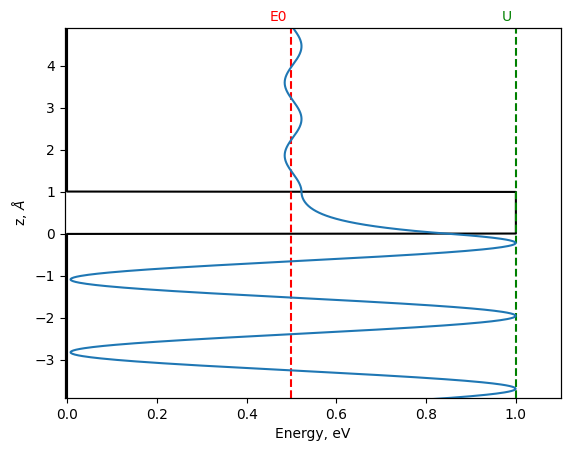

In [6]:
# Define the conditions for energy dependency
def barrier_energy(z, d):
    out = np.zeros_like(z)
    cond = z <= 0
    out[cond] = 0
    cond = np.logical_and(z > 0,  z < d)
    out[cond] = U/e
    cond = z >= d
    out[cond] = 0
    return out
    
# Define the conditions for wave function dependency
def wave_function(z, d, x):
    out = np.zeros_like(z, dtype=np.complex64)
    cond = z <= 0
    out[cond] = np.exp(1j*k*z[cond]) + x[0]*np.exp(-1j*k*z[cond])
    cond = np.logical_and(z > 0,  z < d)
    out[cond] = x[1]*np.exp(-kappa*z[cond]) + x[2]*np.exp(kappa*z[cond])
    cond = z >= d
    out[cond] = x[3]*np.exp(1j*k*z[cond])
    return out


# Define the range of z values
z_min = -4*d
z_max = (4 + 1)*d

z = np.linspace(z_min, z_max, 1000)  # Adjust the range as needed

# Calculate the energy values for each z
barrier_energy_values = barrier_energy(z, d)
wf_energy_values = wave_function(z, d, x)

# Plot the energy and wave function dependencies
fig, ax1 = plt.subplots()

ax1.set_ylabel('z, $\AA$')
ax1.set_xlabel('Energy, eV')
ax1.plot(barrier_energy_values, z*1e9, 'black')

ax1.tick_params(axis='y')
ax1.axvline(x=E0/e, color='red', linestyle='--')
ax1.axvline(x=U/e, color='green', linestyle='--')
# Add labels near the vertical dashed lines
ax1.text(E0/e-0.01, z_max*1e9, 'E0', color='red', verticalalignment='bottom', horizontalalignment='right')
ax1.text(U/e-0.01,  z_max*1e9, 'U', color='green', verticalalignment='bottom', horizontalalignment='right')

ax2 = ax1.twiny()  
color = 'tab:blue'
ax2.plot(np.real(wf_energy_values),  z*1e9, color=color)

ax2.set_ylim([-3.9, 4.9])
ax2.set_xlim([-1.45, 1.7])
ax1.set_xlim([-0.005, 1.1])

ax2.set_xticks([])

plt.show()

The barrier transmission coefficient can be considered as a ratio of the transmitted electrons probability flux density to that one of the incident electrons and determined by ratio of its probability density $|\psi(z)|^2$, because the incident wave amplitude is assumed to be 1 and wave vectors of both incident and transmittrd wave coincide:

$$T = \frac{|\psi_{t}(z)|^2}{|\psi_{s}(z)|^2} = \frac {DD^*}{AA^*} = \left(ch^2(\varkappa d)+\frac{1}{4} \left(\frac{\varkappa}{k} - \frac{k}{\varkappa}\right)^2 sh^2 (\varkappa d)\right)^{-1}\tag{8}$$

The analytical expression for $D$ was obtained by using "Mathematica" [\[4\]](#Bibliography).
For low particle energy $E_0 << U$  and wide rectangular barrier $\varkappa d >> 1$ the probability of transmission simplifies to:
$$T(E) = T_0 \exp{\left(-\frac{2d}{\hbar}\sqrt{2m(U - E_0)}\right)} \tag{9}$$
where $T_0 = 4\left[1 + \frac{1}{4} \left(\frac{\varkappa}{k} - \frac{k}{\varkappa}\right)^2\right]^{-1}$, so we can write

$$ T(E) \approx \frac {16k^2\varkappa^2}{ \left(k^2 + \varkappa^2 \right)^2 } e^{-2\varkappa d} $$

### <a id="step12">1.2.Non-rectangular potential barier. Quasiclassical Approximationr</a>

Another commonly used technique for the solution of the Schrodinger equation is **the quasiclassical approximation** or **WKB approximation**, when the quasiclassical conditions can be implied:

- de Broglie wavelength of the particle $\lambda$ is less than characteristic length $d$:
$$ \left|\frac{d\lambda}{dz} \right| << 2\pi$$
where $ \lambda (z) = 2 \pi \hbar / p(z) $ - de Broglie wavelength of the particle expressed by way of the particle classical momentum $p(z) = \sqrt{2 m (U(z) - E)}$.


- the barrier height should not change much over the length $d << \lambda $ . 


In this case the barrier transparency is 
$$ T(E) \approx \exp\left\{ -\frac{2}{\hbar}\int\limits_{z_1 = 0}^{z_2 = d} \sqrt{2m(U(z) - E)dz} \right\}\tag{10} $$

How we can see, in case of the square barrier there isn't qualitative difference between calculation of transmission coefficient using quantum mechanics  (eq.(9)) or WKB approximation (eq.(10)).



## <a id="step2">2.Tunneling current density in methal-insulator-metal system</a>

<img src="Fig_2b_07_03.png" alt="Consept ot Tunneling" width="40%"  />

#### Fig.2  A schematic showing some of the principles of electron tunneling with energy diagram in case of negative voltages. Where $V$ is applied bias, $e$ is the elementary charge, $I$ is current, $z$ is vertical distance, $E_{F}$ is Fermi level, $\Phi_{t}$, $\Phi_{s}$ are work functions of materials of tip and sample, respectively.



In a metal-insulator-metal (MIM) system, when two metal electrodes are under the same potential, the system is in thermodynamic equilibrium, signifying that their Fermi levels coincide. This equilibrium state implies a balance in electron distribution between the two electrodes. For the initiation of a **tunnel current**, a bias energy $eV$ needs to be applied to the system.

It is known that electric current is the ordered movement of charged particles. In the context of a metal-insulator-metal (MIM) system, the flow of charge carriers, typically electrons, across the insulating barrier constitutes the tunnel current. 

Thus, the number of particles passing through the barrier is given by $N = N_1 - N_2$, where $N_1$ and $N_2$ represent the number of electrons passing in each direction. This quantity detrmines the value of the tunneling current densitu $J$ and depends on the energy density of states $n(p_z)$ and propability $ T(E_z)$ of the electrion transmission through the barrier of height $U(z)$.

$$ N_1 = \int\limits_0^{E_\infty}{T(E_z)n(p_z)dE_z} \tag{11}$$

where
 $$ n(p_z) = \frac{1}{4\pi^3\hbar^3}\int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}{f_1(E)(1 - f_2(E + eV))dp_xdp_y} \tag{12}$$
and $f_1(E)$, $f_2(E + eV)$ - the Fermi-Dirac functions for the first (sample) and the seconde (tip) electrodes, respectively.

After integration the expression (12) in polar coordinates (where $p_r^2=p_x^2+p_y^2$ and $E = E_z + E_r$) and substituting it in (11) we can obtain:

- the number of electrons $N_1$ tunelling through the barrier from elecrtode 1(sample) into electrode 2 (tip)  [\[6\]](#Bibliography):
$$N_1 = \frac{m}{2\pi^2\hbar^3}\int\limits_0^\infty {T(E_z)dE_z}\int\limits_0^\infty{f_1(E_z + E_r)(1 -f_2(E_z + E_r + eV))dE_r} \tag{13}$$

- the number of electrons $N_2$ tunelling through the barrier from elecrtode 2(tip) into electrode 1 (sample) [\[6\]](#Bibliography):
$$N_2 = \frac{m}{2\pi^2\hbar^3}\int\limits_0^\infty {T(E_z)dE_z}\int\limits_0^\infty{f_2(E_z + E_r + eV)(1 -f_1(E_z + E_r))dE_r}\tag{14}$$

Let's denote
$$\xi_1(E_z) = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{f_1(E)(1 - f_2(E + eV))dE_r}$$

$$\xi_2(E_z) = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{f_2(E + eV)(1 - f_1(E))dE_r}$$

$$\xi(E_z,eV)=\xi_1-\xi_2 = \frac{me}{2\pi^2\hbar^3}\int\limits_0^\infty{\left[f_1(E) - f_2(E + eV)\right]dE_r}

So, we can write the expression for calculation tunneling current density in an MIM system for a potential barrier with an arbitrary shape:

$$ J = \int\limits_0^{E_\infty}{T(E_z)\xi(E_z,eV)dE_z} \tag{15}

According Fig.2(2) $U(z)$ can be written in form $U(z) = \mu + \varphi(z)$. Then, integrating (10) by using expression $\int_{z_1}^{z_2}{\sqrt{f(z)dz} = \beta\sqrt{\bar f \delta_z}}$ form [\[6\]](#Bibliography) we get

$$T(E_z) \propto \exp{\left\{-A \delta_z \sqrt{\mu + \bar \phi(z) - E_z}\right\}} \tag{16}$$

where $\bar \phi$ - is average barrier height relative to Fermi level of negative electrode and in the case of vacuum is determined by the work functions of two electrodes. $\mu$ is chemical potential (see Fig.2(b)), in a metal at the temperature close to absolute zero chemical potential coincides with the Fermi level. Factor $A$ is definded in (19). 

At  $T = 0 K$ 

$$\xi(E_z) = \frac{me}{2\pi^2\hbar^3}\begin{cases}
                                        eV, & E_z \in \left[0; \mu - eV \right];\\
                                        \mu - E_z, & E_z \in \left[\mu - eV; \mu \right];\\
                                        0, & E_z > \mu
                                    \end {cases} \tag{17} $$



Introducing (16) and (17) in (15) and integrating the obtained expression, we obtain the aproximate dependence of **tunelling current density on applied voltage** in the MIM system for arbitrary barrier shape (for more details, refer to [\[6\]](#Bibliography),[\[7\]](#Bibliography))

$$J = \frac{J_0}{\delta_z^2}\left\{\bar \phi \exp\left[{-A\delta_z\sqrt{\bar \phi}}\right] - (\bar \phi + eV) \exp\left[-A\delta_z\sqrt{\bar \phi + eV}\right] \right\}\tag{18}$$

where   
        $$ J_0 = \frac{e}{4\pi^2\beta^2\hbar},$$
        $$ A = 2\beta\sqrt{\frac{2m}{\hbar^2}}\tag{19},$$ 
        $\beta$ - the correction factor that depends on the bais, for more details refer to[\[7\]](#Bibliography).  
        $\bar \phi$ - average barrier height,  
        $\delta_z$ - barrier width,  
        $V$ - voltage between electrodes.

**Equation (18) can be applied to any shape of potential barrier providing the mean barrier height is known and can be interpreted as a current density $J_0\bar \phi \exp({-A\delta_z\sqrt{\bar \phi}})$ flowing from electrode 1 to electrode 2 and $ J_0(\bar \phi + eV) \exp(-A\delta_z\sqrt{\bar \phi + eV})$ flowing from electrode 2 to electrode 1 (see, Fig.2(b)).**

A = 2.5613184100792345e+19, J0 = 38452062103353.99


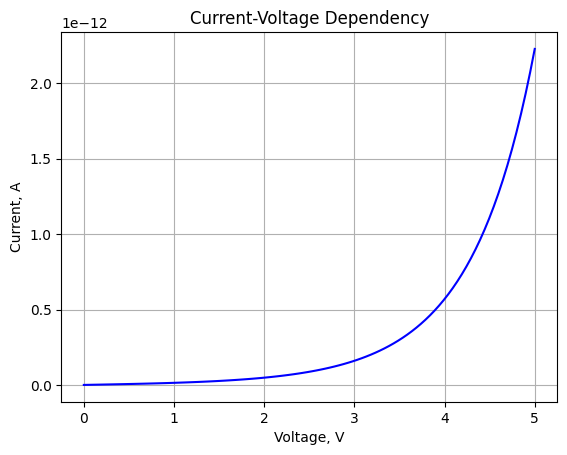

In [8]:
"""  
    Plot the current-voltage dependence for carbon-insulator-platinum barrier structure with width of barrier d = 5e-10 m and contact area S.

    According to [6] and [7] d, phi and beta depend on the applied voltage that we used fot plotting
"""

phi_s = 4.7*e # Work function eV sample (carbon)
phi_t = 5.3*e  # Work function eV tip (platinum)
S = 2 * np.pi * (5e-10)**2


# beta = 1
# ds = d
# phi= (phi_s + phi_t)/2


V0 = np.linspace(0, 5, 100)
ds = np.zeros_like(V0)
phi = np.zeros_like(V0)
beta = np.zeros_like(V0)

cond1 = V0 <= phi_t / e
ds[cond1] = d 
phi[cond1] = (phi_s + (phi_t - e*V0[cond1])) / 2
beta[cond1] = 1

cond2 = V0 > phi_t / e
ds[cond2] = d * phi_s / (e*V0[cond2]) / (1 + (phi_s - phi_t)/(e*V0[cond2])) 
phi[cond2] = phi_s / 2
beta[cond2] = 23/24

A = (2 * beta * np.sqrt(2 * m)) / hbar #eq.19
J0 = e / (4 * hbar * (beta * np.pi)**2)


print(f"A = {A[0]}, J0 = {J0[0]}")


J = (J0 / ds**2) * (phi * np.exp(-A * ds * np.sqrt(phi))
                  -(phi + e*V0) * np.exp(-A * ds * np.sqrt(phi + e*V0)))


plt.plot(V0, J * S, color='blue')

plt.xlabel('Voltage, V')
plt.ylabel('Current, A')
plt.title('Current-Voltage Dependency')

# Show the plot
plt.grid(True)
plt.show()

.....

<img src="Fig_3_20_03.png" alt="Potential barrier in MIM system in case different values of V " width="80%"  />

#### Fig.3  Potential barrier in MIM system in case different values of V: (a) $V \sim 0$; (b) $eV < \Phi_t$ and (c) $eV > \Phi_t.$






### <a id="step21">2.1. Low-Voltage Range</a>

At low voltages $\bar \phi >> eV$ expression (18) can be simplified 

$$ J = J_0\frac{eV}{\delta_z^2}\left[A \delta_z \sqrt{\bar \phi}/2 - 1 \right] \exp \left[ -A\delta_z \sqrt{\bar \phi}\right] \tag{20}$$

Since $A \delta_z \sqrt{\bar \phi}/2 >> 1$ eq.(20) reduces to

$$ J = J_L\frac{\sqrt{\bar \phi}V}{\delta_z} \exp \left[ -A\delta_z\sqrt{\bar \phi}\right] \tag{21}$$

where $$ J_L = \frac{e^2\sqrt{2m}}{4\beta\pi^2\hbar^2} \tag{22} $$

The energy diagram for this case is shown on Fig.3(a), how we can see $\delta_z = d$ and $\bar \phi = (\Phi_s + \Phi_t) / 2$. The coefficient $\beta$ was defined in [\[7\]](#Bibliography), where it was observed that, since $eV \simeq 0$, $\beta$ takes the value unity. $A$ is defined in eq.(19).

Thus, in this case eq(21) expresses $J$ as a linear function of $V$ (see section 1 on the Fig.4.).

### <a id="step22">2.2. Intermediate-Voltage Range</a>

If $eV < \Phi_t$ we can see from Fig.3(b) that $\delta_z = d$ and $\bar \phi = (\Phi_s + \Phi_t - eV)/2$. In [\[7\]](#Bibliography) it is shown, that for this case the tunneling current-voltage relation is given by

$$ J = J_L\frac{\sqrt{\bar \phi} \left[V + \sigma V^3 \right]}{\delta_z}\exp{\left[ -A\delta_z\sqrt{\bar \phi}\right] }, \tag{23}$$

where

$$ \sigma = \frac{(A \delta_z e)^2}{96\bar \phi } - \frac{A \delta_z e^2}{32 {\bar \phi}^{3/2}},$$

The value of $A$ and $J_L$ are defined above in eq.(19) and eq.(22), respectively. Using eq.(23) the current-voltage characteristic was plotted that corresponds section 2 in Fig.4. 

### <a id="step23">2.3. High-Voltage Range</a>

Figure 3(c) illustrates the energy diagram for the case, when $eV > \Phi_t$. From this figure let's define 

$ \delta_z = d \Phi_s(\Phi_s + \Phi_t + eV)$  and

$\bar \phi = \Phi_s/2$.

Substituting this values in eq.(18), we obtain expression for the tunelling current density in high voltage range case:

$$ J = \frac{e^3F^2}{8\pi^2\hbar\Phi_s\beta^2}\left\{\exp{\left[ -\frac{A}{e F}{\Phi_s}^{3/2}\right]} - \left( 1 + \frac{2eV}{\Phi_s}\right)\exp{\left[ -\frac{A}{e F}{\Phi_s}^{3/2}\sqrt{1 + \frac{2eV}{\Phi_s}}\right]} \right\}, \tag{24}  $$

where $ F = V/d $ defines the electric field strength in the insulator.

In this case, it is necessary to determine a value of the correction factor $\beta$, as described in [\[7\]](#Bibliography) $\beta = 23/24$.



For very high voltages, when $eV > \Phi_s + \mu$ the Fermi level of electrode 2 (in our case - tip) lies below the bottom of the conduction band of electrode 1(sample). Under this condition, electrons cannot tunnel from electrode 2 to electrode 1, since there are no empty levels available to them. This situation is similar to autoelectronic emission from a metal electrode into vacuum. Thus, second term in eq.(24) is negligible and we can get 

$$ J = \frac{e^3F^2}{8\pi^2\hbar\Phi_s\beta^2}\exp{\left[ -\frac{A}{e F}{\Phi_s}^{3/2}\right]} \tag{25}$$

Using equations (21)-(25) plot current-voltage characteristic (Fig.4) for case of carbone electrode 1(sample) with $\Phi = 4,7 eV$ and platinum electrode 2 (tip) with $\Phi = 5,3 eV$ at $d = 5 \AA$ and contact area $ S = 10^{-17} m^2 $. 

J_L = [     0.           4965.23940869   9895.05788836  14789.26456225
  19647.66579081  24470.06510875  29256.26316017  34006.05763163
  38719.2431832   43395.61137727  48034.95060509  52637.04601102
  57201.67941428  61728.62922812  66217.67037641  70668.57420743
  75081.10840475  79455.03689515  83790.1197534   88086.11310379
  92342.7690182   96559.83541071 100737.0559284  104874.16983839
 108970.91191076 113027.01229724 117042.19640553 121016.18476899
 124948.69291146 128839.43120705 132688.10473465 136494.41312683
 140258.05041302 143978.70485647 147656.05878494 151289.78841461
 154879.56366692 158425.04797811 161925.89810089 165381.76389794
 168792.28812693 172157.10621632 175475.84603174 178748.12763234
 181973.56301651 185151.75585645 188282.30122103 191364.78528614
 194398.78503197 197383.86792638 200319.59159362 203205.5034675
 206041.14042814 208826.02842122 211559.68205886 214241.6042008
 216871.28551481 219448.20401497 221971.82457642 224441.59842512
 226856.96260093 2292

/tmp/ipykernel_8050/1588914791.py:80: RuntimeWarning: divide by zero encountered in divide
  A3 = 2 * beta * (phi_s**(3/2)) * np.sqrt(2*m)/(e*F*hbar)


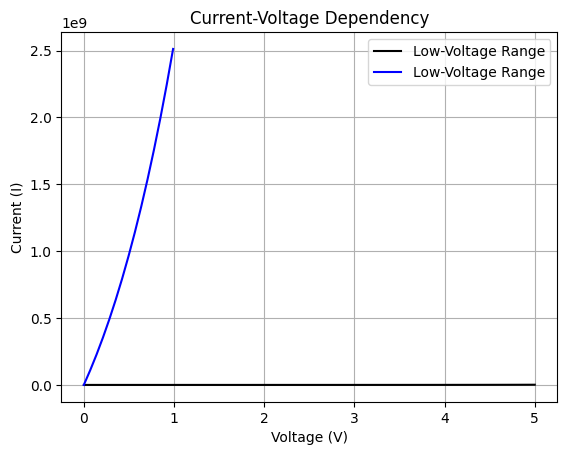

In [21]:
"""
    Using equations (21)-(25) plot current-voltage characteristic for case of 
        phi_s = 4,7 * 1.6e-19 J - work function of carbone - electrode 1(sample);
        phi_t = 5,3 1.6e-19 J - work function of platinum electrode 2 (tip) with ;
        d = 5 e-10 m - distance between electrodes 
        S = 10-17 m^2 - contact area S = 10-17 m^2. 
        V -  applied voltage in V
"""

# m = 9.11e-31 #Electron mass in  eV*s^2/m^2
# h = 2*np.pi*1.054e-34 #redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s
# hbar = 1.054e-34 #redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s
# e = 1.6e-19 #elementary charge [C]
d = 5e-10
# phi_s = 4.7*e # Work function eV sample
# phi_t = 5.3*e  # Work function eV tip

V = np.linspace(0, 7, 100)
delta = np.zeros_like(V)
phi = np.zeros_like(V)
beta = np.zeros_like(V)

# Low-Voltage Range : phi >> eV
cond1 = V < 1
delta[cond1] = d 
phi[cond1] = (phi_s + phi_t) / 2
beta[cond1]= 1

# Intermediate-Voltage Range : eV < phi
cond2 = V <= phi_t / e
delta[cond2] = d 
phi[cond2] = (phi_s + (phi_t - e*V[cond2])) / 2
beta[cond2] = 1

# High-Voltage Range: eV > phi_t
cond3 = V > phi_t / e
delta[cond3] = d * phi_s / (e*V[cond3]) / (1 + (phi_s - phi_t)/(e*V[cond3])) 
phi[cond3] = phi_s / 2
beta[cond3] = 23/24



# Low-Voltage Range : phi >> eV

# beta = 1  #the correction factor

# phi = (phi_s+phi_t)/2

# V_1=np.linspace(0, 1, 100)

A1 = (2 * beta * np.sqrt(2*m)) / hbar #eq.19
J_L1 = ((e**2) * np.sqrt(2*m)) / (beta * (2*np.pi*hbar)**2) #eq.22
J_1 = J_L1 * np.sqrt(phi) * np.exp(-A1 * d *np.sqrt(phi)) * (V / d) #eq.21
J_1[~cond1] = np.nan

print(f"J_L = {J_L1 *np.sqrt(phi) * V}")

# Intermediate-Voltage Range : eV < phi
A2 = (2 * beta * np.sqrt(2*m)) / hbar #eq.19
sigma = (A2 * d * e)**2 / (96 * phi) - A2*d * e**2 / (32 * phi**1.5)

# phi = (phi_s + phi_t - e * V)/2

J_L2 = ((e**2) * np.sqrt(2*m)) / (beta * (2*np.pi*hbar)**2) #eq.22
J_2 = J_L2 * np.sqrt(phi) * np.exp(-A2 * d * np.sqrt(phi)) * (V + sigma * V) / d #eq.23

# J_2 = (np.sqrt(2 * m) / h**2) * e * V * (phi_s + e * V / 2) * np.exp((-4 * np.pi * d / h ) * np.sqrt(2 * m) * (phi_s + np.sqrt(e * V / 2))) # old article


J_2[~cond2] = np.nan

# High-Voltage Range: eV > phi_t

# phi = phi_s/2
# V_3=np.linspace(phi_t/e, 7, 100)
# d_3 = d*phi_s/(phi_t - phi_s + e*V_3)
# d_h = d*phi_s/e*V_3

F = V/d
A3 = 2 * beta * (phi_s**(3/2)) * np.sqrt(2*m)/(e*F*hbar)
C3 = (e**3)*(F**2)/(8*(np.pi**2)*hbar*phi_s*(beta**2))
J_3 = C3 * (np.exp(-A3)
    - (1 + (2*e*V)/phi_s)*np.exp(-A3 * np.sqrt(1 + (2 * e * V) / phi_s))) #eq.24

J_3[cond2] = np.nan
# print(f"F={(e**3)*(F**2)/(8*(np.pi**2)*hbar*phi_s*(beta**2))}")

#if eV > phi + mu

# V_4=np.linspace(7, 10, 100)

# d_4 = d*phi_s/(phi_s - phi_t + e*V_4)

# F = V_4/d_4

# J_4 = (e**3)*(F**2)/(8*(math.pi**2)*hbar*phi_s*(beta**2))*np.exp(-4*math.pi*beta*(phi_s**(3/2))*np.sqrt(m)/(e*F))#eq.25    
 #eq.24


# Plot each interval's I(V) dependency
plt.plot(V0, J, label="Low-Voltage Range", color='black')

plt.plot(V, J_1, label="Low-Voltage Range", color='blue')
# plt.plot(V, J_2, label="Intermediate-Voltage Range", color='red')
# plt.plot(V, J_3, label="High-Voltage Range", color='green')
# plt.plot(V_4, J_4, label="High-Voltage Range (if eV > phi + mu)", color='orange')

# Add labels and legend
plt.xlabel('Voltage (V)')
plt.ylabel('Current (I)')
plt.title('Current-Voltage Dependency')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

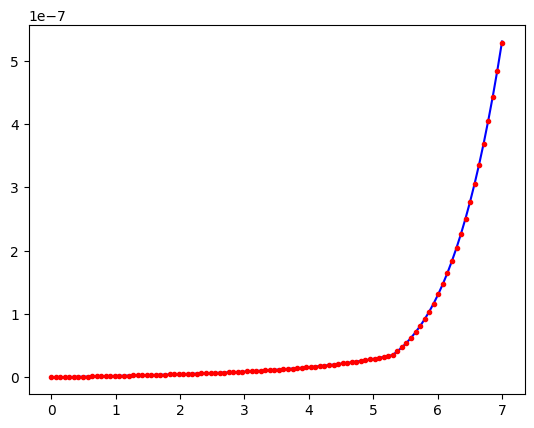

In [ ]:
V = np.linspace(0, 7, 100)
ds = np.zeros_like(V)
phi = np.zeros_like(V)

A = (2 * beta * np.sqrt(2 * m)) / hbar #eq.19
J0 = e / (2 * np.pi * h * (beta)**2)
# print(f"A = {A}, J0 = {J0:g}")

beta = 1
cond1 = V <= phi_t / e
ds[cond1] = d 
phi[cond1] = (phi_s + (phi_t - e*V[cond1])) / 2

cond2 = V > phi_t / e
ds[cond2] = d * phi_s / (e*V[cond2]) / (1 + (phi_s - phi_t)/(e*V[cond2])) 
phi[cond2] = phi_s / 2


J = (J0 / ds**2) * (phi * np.exp(-A * ds * np.sqrt(phi))
                  -(phi - e*V) * np.exp(-A * ds * np.sqrt(phi + e*V)))

J_1 = (J0 / ds**2) * (phi * np.exp(-A * ds * np.sqrt(phi))
                  -(phi - e*V) * np.exp(-A * ds * np.sqrt(phi)*(1 + e*V/phi/2)))



# J_L = ((e**2) * np.sqrt(2*m)) / (beta * (2*np.pi*hbar)**2) #eq.22

# J_1 = J_L / d * np.sqrt(phi) * np.exp(-A * d * np.sqrt(phi)) * V #eq.21
# J_1[V > 1] = np.nan

# sigma = (A*d * e)**2 / (96 * phi) - A*d * e**2 / (32 * phi**1.5)
# J_2 = J_L / d * np.sqrt(phi) * np.exp(-A * d * np.sqrt(phi)) * (V + sigma * V**3) #eq.23
# J_2[V < 1] = np.nan
# J_2[cond2] = np.nan

# F = V/ds
# A3 = 2 * beta * (phi_s**(3/2)) * np.sqrt(2*m)/(e*F*hbar)
# C3 = (e**3)*(F**2)/(8*(np.pi**2)*hbar*phi_s*(beta**2))
# J_3 = C3 * (np.exp(-A3)
#     - (1 + (2*e*V)/phi_s)*np.exp(-A3 * np.sqrt(1 + (2 * e * V) / phi_s))) #eq.24
# J_3[cond1] = np.nan

S = 2 * np.pi * (5e-10)**2

# plt.plot(V, ds, color='blue')
# plt.plot(V, A*ds*np.sqrt(phi)/2, color='blue')
# plt.plot(V, np.exp(-A * ds * np.sqrt(phi + e*V)), color='blue')
# plt.plot(V, np.exp(-A * ds * np.sqrt(phi) * (1 + e*V/phi/2)), '.', color='red')
# plt.plot(V, phi / e, color='blue')
# plt.plot(V, sigma, color='blue')
plt.plot(V, J * S, color='blue')
plt.plot(V, J_1 * S, '.', color='red')
# plt.plot(V, J_2 * S, color='green')
# plt.plot(V, J_3 * S, color='cyan')
# plt.ylim([0,1e-08])


In [ ]:
F = V_3/d_3

C =-2*beta*(phi_s**(3/2))*np.sqrt(2*m)/(e*F*hbar)
print(f"d = {d_3[0]}")
print(f"V = {V_3[0]}")
print(f"F = {F[0]}")
print(f"E = {C[0]}")


d = 4.1964285714285724e-10
V = 5.0
F = 11914893617.021275
E = -8.396470656489624



From this basic model, some important features of a more realistic metal-vacuum-metal tunneling can be explained. 


The probability density for observation of an electron on the other side of the barrier, i.e. **tunneling current** is proportional $ |\psi(0)|^2e^{-2\varkappa z} $.
Where $\varkappa = \frac{\sqrt{2m(|U| - E})}{\hbar}$ is decay constant that describes an electron penetraiting through the barrier into $+z$ direction. If $U - E = \Phi$ for low $V$ we obtain:

$$ J_{t} = I_0 \exp\left(-\frac{2d  \sqrt{2m_e\Phi}}{\hbar}\right) $$

$I_0$  is a prefactor that depends on the material properties.

$d$  is the tip-sample distance.

$m_{e}$  is the effective mass of the tunneling electrons.

$\Phi$  is the work function of the material.

$V$  is the applied voltage.

$\hbar$  is the reduced Planck's constant.

<!-- $k$  is the tunneling attenuation constant. -->



In [28]:
"""
    Dependence of the tunnel current on the barrier width.

    In this section we also calculate the value of the wave vector for studing system. This value will be used in previous blocks.
     
"""
e = 1.6e-19
I0 = 4965.2   # Adjust as needed
phi = 4.5 *e  # Work function eV
V = 0.3 * e # Applied voltage in eV

A = (np.sqrt(2 * m * (phi - V))/hbar) # is the wave vector in 1/A, if V is low. 
print(f"k = {k:.4} 1/nm")

# Calculate the varying tip-sample separation (distance) from the surface profile
z = np.linspace(1e-10, 5e-10, 100)
tunneling_current = I0 / z * np.exp(-2 * A * z) # redused Planck constant in 6.5821e-16 eV*s or 1.054e-34 J*s

# Plot the results
plt.plot(z*1e10, tunneling_current,label='Tunneling Current')
plt.xlabel('z, $\AA$')
plt.ylabel('$I_{t}$, A')
plt.title('Tunneling Current vs Barrier width')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported format string passed to numpy.ndarray.__format__

The tunneling current decays exponentially with the distance gap distance z, and
is strongly affected by the density of states (DOS) of the sample at the Fermi level,

tunnel curren density J = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


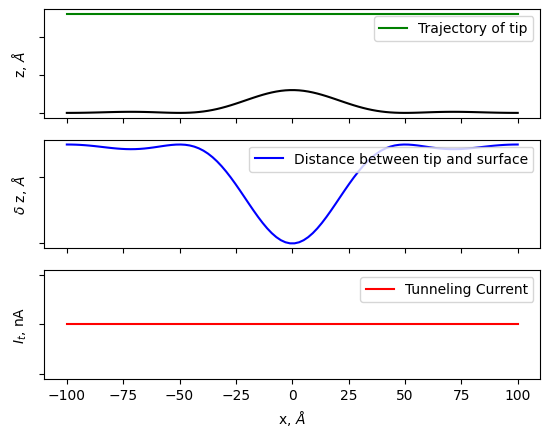

In [26]:
"""
    Using analitical solutions to find the tunnel current through a one-dimensional potential barrier :

    - dependence of the tunnel current on the distance between the tip and the surface of the sample (Fig.1c);

"""

# Surface profile function sinc^2(x)
# Parameters for scaling and shifting
width_scaling_factor = 5e-9 # m Adjust this value to widen or narrow the peak
height_scaling_factor = 0.3e-10  # m Adjust this value to lower or raise the entire function

def surface_profile(x):
    return height_scaling_factor * np.sinc(x / width_scaling_factor)**2  # Example: sine wave profile

# Generate x values for the surface profile
x_values = np.linspace(-10e-9, 10e-9, 100)

profile = surface_profile(x_values)
z0 = np.max(profile) + 1e-10 # distance between the tip and sample's surface
z = z0 - profile 
# Calculate tunneling current at each position x
tunneling_current_surface = I0 * np.sqrt(phi) * V / z * np.exp(-2 * A * z) #6.58e-16eV 1.054e-34
print (f"tunnel curren density J = {tunneling_current_surface}")

# Create a figure with two subplots stacked vertically
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)

# Plot: Distance between tip and surface
ax0.plot(x_values/1e-10, profile/1e-10, color='black') #label='Distance between tip and surface',
ax0.plot(x_values/1e-10, z0/1e-10 * np.ones_like(x_values), label='Trajectory of tip', color='green' )  # Plotting z0(x)

ax0.set_ylabel('z, $\AA$')
ax0.set_yticklabels([])
ax0.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot: Distance between tip and surface
ax1.plot(x_values/1e-10, z/1e-10, label='Distance between tip and surface', color='blue') #
ax1.set_ylabel('$\delta$ z, $\AA$')
ax1.set_yticklabels([])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot the results for power-law relationship on the second subplot
ax2.plot(x_values/1e-10, tunneling_current_surface, label='Tunneling Current', color='red')
ax2.set_xlabel('x, $\AA$ ')
ax2.set_yticklabels([])
ax2.set_ylabel('$I_{t}$, nA')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

# plt.suptitle('Tunneling Current vs Tip-Sample Separation')
plt.show()

STM constant current maps provide information about the variations in the
electron density, and do not necessarily correspond to the location of atoms (nuclei). 


$$d(x)\sim− \frac{1}{2κ} \ln\left(\frac{I_{t}(x)}{I_0}\right) $$

$I_{t}$ is the tunneling current.

$I_0$  is a prefactor that depends on the material properties.

$d$  is the tip-sample distance.

$k$  is the tunneling attenuation constant: $k = \frac{\sqrt{2m\Phi}}{\hbar}$

$\hbar$  is the reduced Planck's constant.



d =  [2.73633515e-23            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan    

/tmp/ipykernel_8050/651173033.py:11: RuntimeWarning: invalid value encountered in sqrt
  k = (np.sqrt(2 * m * (phi - V))) # the tunneling attenuation constant    6.5821e-16 eV*s


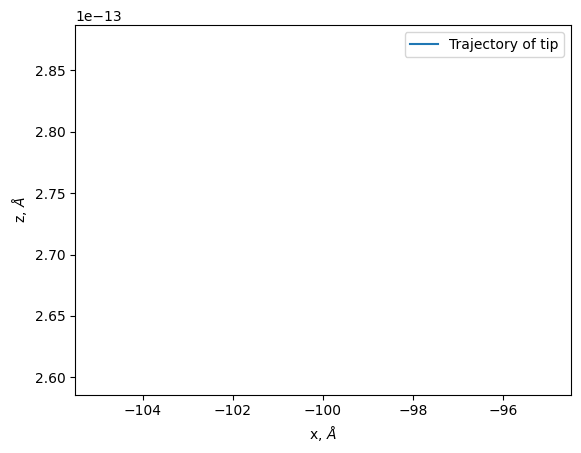

In [25]:
"""
    Using analitical solutions to find the coordinate a one-dimensional potential barrier :

    - dependence of the posution z of the tip ander the surface at tunneling current and distance const (Fig.1b)  

"""
# Constants
I0 = 4965.2# Constant tunneling current
It = 1.02240355e-16

k = (np.sqrt(2 * m * (phi - V))) # the tunneling attenuation constant    6.5821e-16 eV*s

width_scaling_factor = 5e-9 # m Adjust this value to widen or narrow the peak
height_scaling_factor = 0.3e-10  # m Adjust this value to lower or raise the entire function

def surface_profile(x):
    return height_scaling_factor * np.sinc(x / width_scaling_factor)**2  # Example: sine wave profile

# Generate x values for the surface profile
x_values = np.linspace(-10e-9, 10e-9, 100)

# Generate tunneling current values (constant)
z0 = surface_profile(x_values)

# Generate tip-sample distance values (constant)
d = (-(1 / 2*k) * np.log(It / I0))
z = z0 + d
print ('d = ',d)


# Plotting
plt.plot(x_values/1e-10, z/1e-10, label='Trajectory of tip')
# plt.plot(x_values/1e-10, z0/1e-10, label='Surface Profile', color='green')

plt.xlabel('x, $\AA$')
plt.ylabel('z, $\AA$')
plt.title('')
plt.legend()
plt.show()

STM plays with the very top (outermost) atom at the tip and the
nearest atom on sample; so the whole tip is not necessarily very sharp
in shape, different from the case of AFM, where spatial “contact” is
necessary and crucial for feedback.
How do we obtain these wonderful tunneling tips where only one
atom is at the top?
Answer: really easy to obtain such tips, simply by cutting a thin metal
wire using a wire cutter --- there is always a single atom left over at the
very top.

• STM does NOT probe the nuclear position directly, but rather it is a probe of the
local density of electronic states , so STM images do not always show the
position of the atoms. STM imaging depends on the nature of the surface and the
magnitude and sign of the tunneling current. 

### Bibliography

[1] G. Binnig, H. Rohrer, Scanning tunneling microscopy, Physica B+C, 127, Issues 1–3, P.37-45, 1984. https://doi.org/10.1016/S0378-4363(84)80008-X.

[2] S. Lounis, Theory of Scanning Tunneling Microscopy, arXiv:1404.0961, 2014. https://doi.org/10.48550/arXiv.1404.0961.

[3] M. Ye, S. Eremeev, K. Kuroda et al, Quasiparticle interference on the surface of 3D topological insulator $\text{Bi}_{2}\text{Se}_{3}$ induced by cobalt adatom in the absence of ferromagnetic ordering,  arXiv:1112.3206, 2011. https://doi.org/10.48550/arXiv.1112.3206.

[4] https://www.wolfram.com/mathematica/

[5] https://en.wikipedia.org/wiki/WKB_approximation

[6] https://www.ntmdt-si.com/resources/spm-theory/theoretical-background-of-spm/1-scanning-tunnel-microscopy-stm

[7] John G. Simmons, Generalized Formula for the Electric Tunnel Effect between Similar Electrodes Separated by a Thin Insulating Film, J. Appl. Phys. 34, P.1793–1803, 1963. https://doi.org/10.1063/1.1702682.


